# planet-understanding-the-amazon-from-space

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

from planet import *

In [4]:
PATH = '/home/borowis/s3'

In [5]:
ls {PATH}

sample_submission_v2.csv  test-jpg-additional/      train-jpg/
test-jpg/                 test_v2_file_mapping.csv  train_v2.csv


# multi label

In [6]:
metrics = [f2]
f_model = resnet34

In [8]:
label_csv = f'{PATH}/train_v2.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [9]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, transforms_top_down, max_zoom = 1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms = tfms, suffix = '.jpg', 
                                        val_idxs = val_idxs, test_name = 'test-jpg')

In [10]:
data = get_data(64)

In [11]:
data = data.resize(int(64*1.3), 'tmp')

In [12]:
learn = ConvLearner.pretrained(f_model, data, metrics = metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/borowis/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 19428007.27it/s]


epoch      trn_loss   val_loss   f2                          
    0      0.217808   0.289875   0.829447  



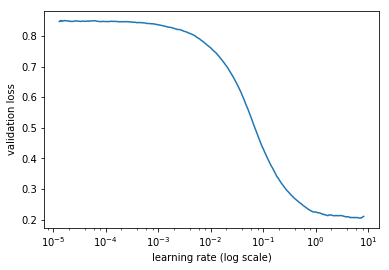

In [13]:
lrf = learn.lr_find()
learn.sched.plot()

In [14]:
lr = 0.2

In [15]:
learn.fit(lr, 3, cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   f2                          
    0      0.148586   0.132767   0.883217  
    1      0.143447   0.127722   0.887822                    
    2      0.134575   0.125105   0.891185                    
    3      0.139888   0.125518   0.889785                    
    4      0.136921   0.123426   0.892397                    
    5      0.13365    0.121311   0.895296                    
    6      0.130139   0.121563   0.894305                    



[0.12156299452876662, 0.89430526688528289]

In [16]:
lrs = np.array([lr / 9, lr / 3, lr])

In [17]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len = 1, cycle_mult = 2)

epoch      trn_loss   val_loss   f2                          
    0      0.123122   0.10885    0.90848   
    1      0.117439   0.105398   0.910827                    
    2      0.104933   0.100027   0.916188                    
    3      0.110297   0.104712   0.910897                    
    4      0.105774   0.099827   0.914601                    
    5      0.102372   0.096354   0.919566                     
    6      0.098592   0.096043   0.919165                     



[0.096043156076353817, 0.91916517263195885]

In [ ]:
learn.save('64')
# learn.load('64')

In [ ]:
learn.sched.plot_loss()